In [1]:
import sys

# Replace this with the path to the repository
sys.path.append("/home/zhenhao/ETFMH/")

In [2]:
from db_sketching.kmer_set import KMerSet, FracMinHash, ErrorTolerantFracMinHash, TruncatedKMerSet
from Bio import SeqIO

# Path to the datasets we are testing
data_1 = ["../data/562.fna"]
data_2 = ["../data/564.fna"]

# The boolean function used in FracMinHash
def cond(kmer_hash):
    hash = (976369 * kmer_hash + 1982627) % 10000
    if hash < 100:
        return True
    else:
        return False

def all(kmer_hash):
    return True

containment = []
ANI = []
set_size = []

for k in range(8, 52):    
    frac1 = TruncatedKMerSet(all, k)
    frac2 = TruncatedKMerSet(all, k)

    # insert dataset
    frac1.insert_file_list(data_1)
    frac2.insert_file_list(data_2)

    # Calculate containment index and estimate ANI
    containment.append(frac1.containment(frac2))
    ANI.append(frac1.conditional_probability(frac2))

    #print(frac1.conditional_probability(frac2))

    # Record the size of k-mer set as well
    set_size.append(len(frac1.set))

    print(f"k: {k},\tSet size: {set_size[-1]},\tcontainment: {containment[-1]},\tANI: {ANI[-1]}")

k: 8,	Set size: 65432,	containment: 0.9987773566450666,	ANI: 0.9988383208980511
k: 9,	Set size: 258006,	containment: 0.9900506189778532,	ANI: 0.9912625795837754
k: 10,	Set size: 924900,	containment: 0.9240642231592605,	ANI: 0.9333504827392378
k: 11,	Set size: 2368398,	containment: 0.7053527320999258,	ANI: 0.7633175570358518
k: 12,	Set size: 3884139,	containment: 0.4262048809272789,	ANI: 0.6042452922456306
k: 13,	Set size: 4729041,	containment: 0.24016497213705695,	ANI: 0.563497525059837
k: 14,	Set size: 5052239,	containment: 0.15746028641954588,	ANI: 0.6556318885310971
k: 15,	Set size: 5157861,	containment: 0.12590994600281008,	ANI: 0.799625162377138
k: 16,	Set size: 5191479,	containment: 0.11349501750849807,	ANI: 0.9013934460188151
k: 17,	Set size: 5203229,	containment: 0.10692494987247342,	ANI: 0.9421064662287943
k: 18,	Set size: 5208318,	containment: 0.10215927675691078,	ANI: 0.9554246604632017
k: 19,	Set size: 5211161,	containment: 0.09840033727608877,	ANI: 0.9632000763585814
k: 20

Text(0.5, 0, 'k')

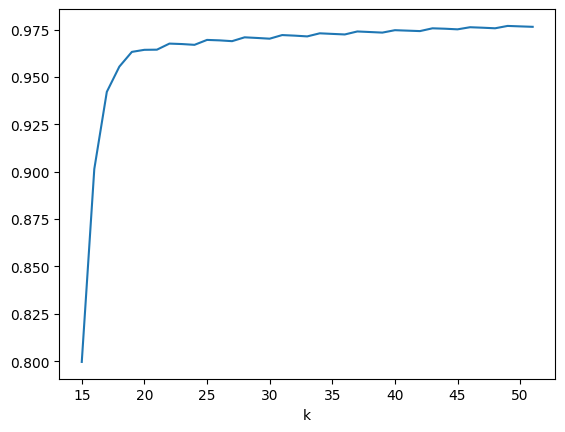

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(15, 52), ANI[7:])
plt.xlabel("k")

In [1]:
from pymummer import coords_file, alignment, nucmer

reference_file = "../data/562.fna"
query_file = "../data/564.fna"
results_file = "./result.txt"

runner = nucmer.Runner(reference_file, query_file, results_file) 
runner.run()
file_reader = coords_file.reader(results_file)
alignments = [coord for coord in file_reader if not coord.is_self_hit()] #Remove self hits

In [8]:
alignments[0].qry_start

12644

In [9]:
alignments[0].qry_end

90

In [11]:
alignments[0].

95.52